<a href="https://colab.research.google.com/github/riskigirsang68-ai/pemograman-dasar/blob/main/tugas_pertemuan_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== DATA AWAL ===
   Suhu (°C)  Tekanan (Bar)
0  54.967142     134.409321
1  48.617357     130.804783
2  56.476885     141.124727
3  65.230299     157.787192
4  47.658466     123.258890 

=== STATISTIK DESKRIPTIF ===
       Suhu (°C)  Tekanan (Bar)
count  30.000000      30.000000
mean   48.118531     119.690515
std     9.000064      23.422994
min    30.867198      74.484444
25%    44.089491     106.802555
50%    47.658548     120.007781
75%    53.603353     134.002235
max    65.792128     165.524638 

Rata-rata Suhu: 48.12 °C
Rata-rata Tekanan: 119.69 Bar

Koefisien Korelasi (r): 0.980
Nilai p-value: 0.00000
→ Hasil: Ada hubungan signifikan antara suhu dan tekanan.



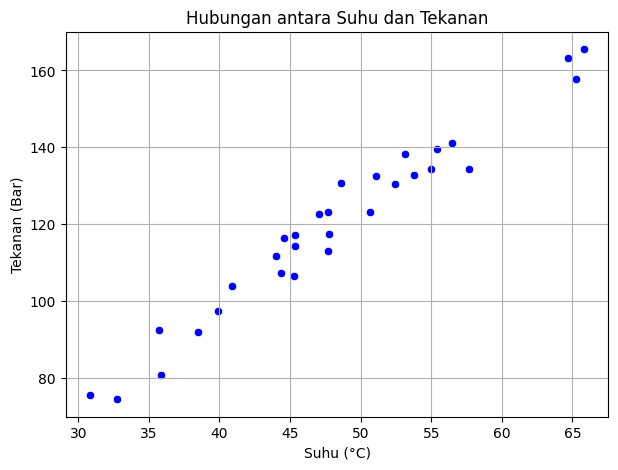

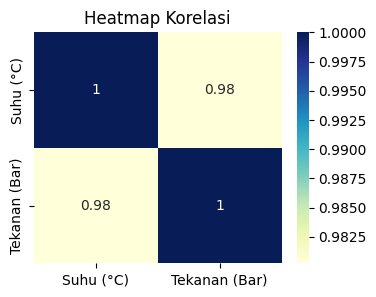

=== MODEL REGRESI LINEAR ===
Koefisien (slope): 2.549
Intercept: -3.020
Akurasi (R^2): 0.951



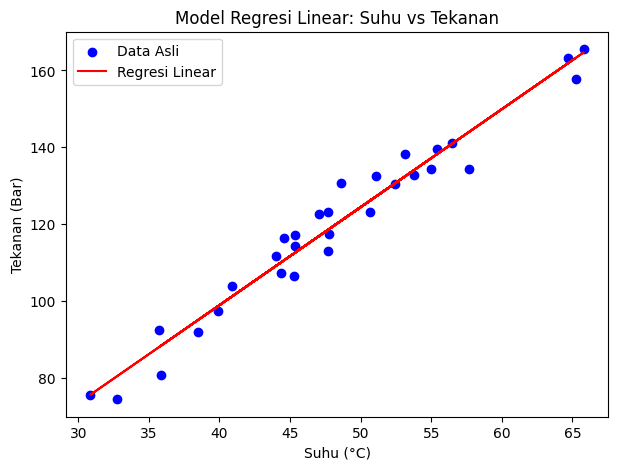

=== KESIMPULAN ===
Model menunjukkan bahwa tekanan meningkat seiring dengan kenaikan suhu.
Koefisien korelasi 0.98 menunjukkan hubungan linear yang kuat antara kedua variabel.
Dengan model regresi sederhana, nilai R² sebesar 0.95 menandakan model cukup akurat dalam memprediksi tekanan berdasarkan suhu.


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# ---------------------------------------------------
# 1. MEMBUAT DATA SEDERHANA (Suhu vs Tekanan)
# ---------------------------------------------------

np.random.seed(42)
suhu = np.random.normal(50, 10, 30)        # 30 data suhu (°C)
tekanan = 2.5 * suhu + np.random.normal(0, 5, 30)  # tekanan (bar) dipengaruhi oleh suhu

# Membuat DataFrame
df = pd.DataFrame({
    "Suhu (°C)": suhu,
    "Tekanan (Bar)": tekanan
})

print("=== DATA AWAL ===")
print(df.head(), "\n")

# ---------------------------------------------------
# 2. ANALISIS STATISTIK DASAR DENGAN PANDAS DAN NUMPY
# ---------------------------------------------------

print("=== STATISTIK DESKRIPTIF ===")
print(df.describe(), "\n")

mean_suhu = np.mean(df["Suhu (°C)"])
mean_tekanan = np.mean(df["Tekanan (Bar)"])

print(f"Rata-rata Suhu: {mean_suhu:.2f} °C")
print(f"Rata-rata Tekanan: {mean_tekanan:.2f} Bar\n")

# ---------------------------------------------------
# 3. ANALISIS KORELASI DAN UJI HUBUNGAN (SCI-PY)
# ---------------------------------------------------

corr = df["Suhu (°C)"].corr(df["Tekanan (Bar)"])
print(f"Koefisien Korelasi (r): {corr:.3f}")

# Uji hubungan linear menggunakan Pearson
r_val, p_val = stats.pearsonr(df["Suhu (°C)"], df["Tekanan (Bar)"])
print(f"Nilai p-value: {p_val:.5f}")
if p_val < 0.05:
    print("→ Hasil: Ada hubungan signifikan antara suhu dan tekanan.\n")
else:
    print("→ Hasil: Tidak ada hubungan signifikan.\n")

# ---------------------------------------------------
# 4. VISUALISASI DATA DENGAN MATPLOTLIB & SEABORN
# ---------------------------------------------------

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="Suhu (°C)", y="Tekanan (Bar)", color="blue")
plt.title("Hubungan antara Suhu dan Tekanan")
plt.xlabel("Suhu (°C)")
plt.ylabel("Tekanan (Bar)")
plt.grid(True)
plt.show()

# Heatmap Korelasi
plt.figure(figsize=(4, 3))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Heatmap Korelasi")
plt.show()

# ---------------------------------------------------
# 5. PEMODELAN REGRESI LINEAR (SCIKIT-LEARN)
# ---------------------------------------------------

# Membagi data menjadi data latih dan data uji
X = df[["Suhu (°C)"]]
y = df["Tekanan (Bar)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

print("=== MODEL REGRESI LINEAR ===")
print(f"Koefisien (slope): {model.coef_[0]:.3f}")
print(f"Intercept: {model.intercept_:.3f}")
print(f"Akurasi (R^2): {model.score(X_test, y_test):.3f}\n")

# Visualisasi hasil regresi
plt.figure(figsize=(7,5))
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X, model.predict(X), color='red', label='Regresi Linear')
plt.title("Model Regresi Linear: Suhu vs Tekanan")
plt.xlabel("Suhu (°C)")
plt.ylabel("Tekanan (Bar)")
plt.legend()
plt.show()

# ---------------------------------------------------
# 6. KESIMPULAN OTOMATIS
# ---------------------------------------------------
print("=== KESIMPULAN ===")
print(f"Model menunjukkan bahwa tekanan meningkat seiring dengan kenaikan suhu.")
print(f"Koefisien korelasi {corr:.2f} menunjukkan hubungan linear yang kuat antara kedua variabel.")
print(f"Dengan model regresi sederhana, nilai R² sebesar {model.score(X_test, y_test):.2f} menandakan model cukup akurat dalam memprediksi tekanan berdasarkan suhu.")